# BELTRANS translation statistics

This notebook displays statistics about the book translations in the BELTRANS corpus. It aims to measure the improvement performed by different data integration or enrichment techniques.


In [1]:
import pandas as pd
import sys, os

sys.path.insert(1, os.pardir)
import utils
import utils_stats
import utils_plot

## Existing measurements

The measured statistics currently evolve like this:



In [2]:
translationMeasurementFiles = [
    '2022-05-03_translation-stats.csv', '2022-05-09_translation-stats.csv', 
    '2022-05-23_translation-stats.csv', '2022-06-07_translation-stats.csv',
    '2022-06-16_translation-stats.csv', '2022-06-20_translation-stats.csv',
    '2022-06-23_translation-stats.csv', '2022-06-24_translation-stats.csv',
    '2022-07-18_translation-stats.csv', '2022-07-20_translation-stats.csv',
    '2022-07-21_translation-stats.csv', '2022-07-25_translation-stats.csv',
    '2022-07-26_translation-stats.csv', '2022-07-27_translation-stats.csv',
    '2022-08-08_translation-stats.csv', '2022-08-11_translation-stats.csv'
]

In [3]:
translationStats = utils_stats.mergeMeasurementsToDataFrame('./measurements', translationMeasurementFiles)
statsFRNL = translationStats[translationStats['corpus'] == 'FR-NL'].copy()
statsNLFR = translationStats[translationStats['corpus'] == 'NL-FR'].copy()
statsOther = translationStats[translationStats['corpus'] == 'OTHER'].copy()

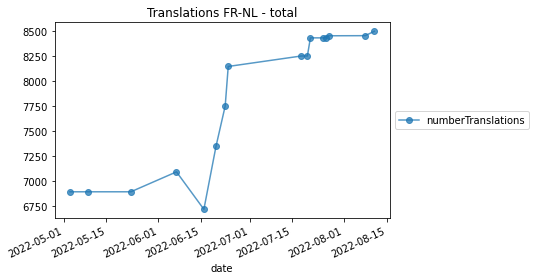

In [4]:
utils_plot.plotNumberTimeline(statsFRNL,
                                  ['numberTranslations'],
                                  'Translations FR-NL - total')

In [5]:
statsFRNL[['numberTranslations', 'comment']].sort_index()

,numberTranslations,comment
date,,
2022-05-03,6891,"Data integrated from KBR, BnF and KB based on ..."
2022-05-09,6891,"Data integrated from KBR, BnF and KB based on ..."
2022-05-23,6891,No changes to previous version.
2022-06-07,7091,Added publishing directors and included a coll...
2022-06-16,6715,Removed duplicate manifestations with the same...
2022-06-20,7350,New KBR data dump with plenty of additions and...
2022-06-23,7752,No ISBN duplicate removal anymore to prevent d...
2022-06-24,8149,"New KBR dump with old Dutch, old French and mi..."
2022-07-18,8254,Dataprofile query filtering also for Belgian o...


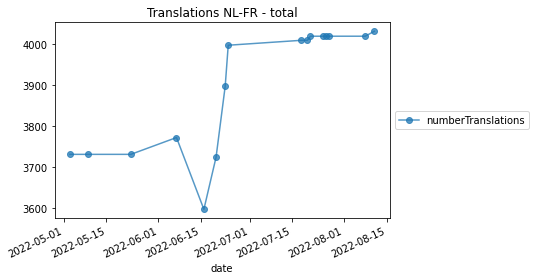

In [6]:
utils_plot.plotNumberTimeline(statsNLFR,
                                  ['numberTranslations'],
                                  'Translations NL-FR - total')

In [7]:
statsNLFR[['numberTranslations']].sort_index()

,numberTranslations
date,
2022-05-03,3731
2022-05-09,3731
2022-05-23,3731
2022-06-07,3772
2022-06-16,3597
2022-06-20,3724
2022-06-23,3897
2022-06-24,3997
2022-07-18,4009


## Identifiers
The total number of translations and how much have which third party identifier.

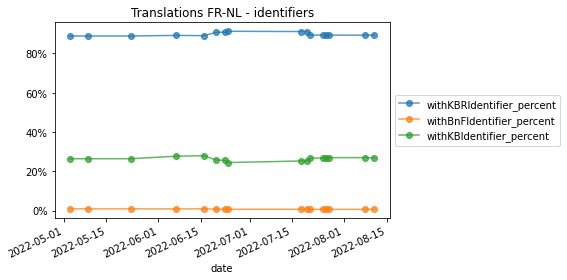

In [8]:
utils_plot.plotPercentageTimeline(statsFRNL,
                                  ['withKBRIdentifier', 'withBnFIdentifier', 'withKBIdentifier'],
                                  'Translations FR-NL - identifiers',
                                 'numberTranslations')

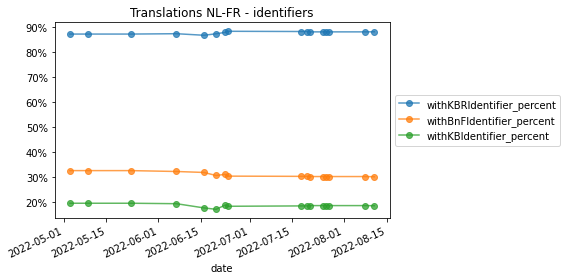

In [9]:
utils_plot.plotPercentageTimeline(statsNLFR,
                                  ['withKBRIdentifier', 'withBnFIdentifier', 'withKBIdentifier'],
                                  'Translations NL-FR - identifiers',
                                 'numberTranslations')

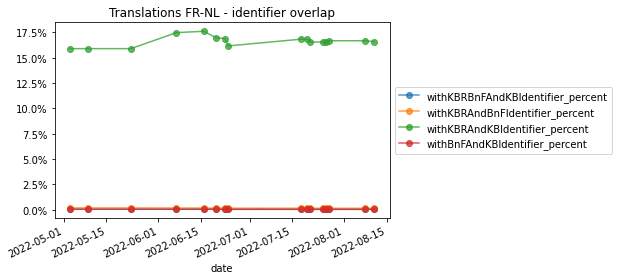

In [10]:
utils_plot.plotPercentageTimeline(statsFRNL,
                                  ['withKBRBnFAndKBIdentifier', 'withKBRAndBnFIdentifier',
                                  'withKBRAndKBIdentifier', 'withBnFAndKBIdentifier'],
                                  'Translations FR-NL - identifier overlap',
                                 'numberTranslations')

Because of the outlier KBR&KB below a graph without that line

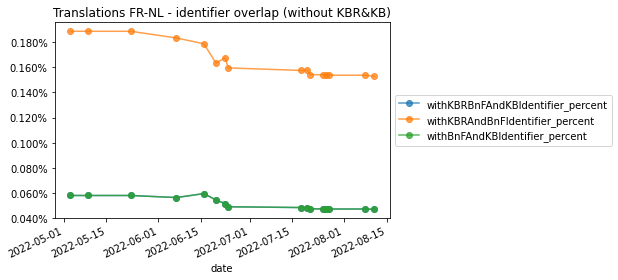

In [11]:
utils_plot.plotPercentageTimeline(statsFRNL,
                                  ['withKBRBnFAndKBIdentifier', 'withKBRAndBnFIdentifier', 'withBnFAndKBIdentifier'],
                                  'Translations FR-NL - identifier overlap (without KBR&KB)',
                                 'numberTranslations')

In [12]:
from IPython.display import display, Markdown
display(Markdown(statsFRNL['comment'].to_markdown()))

| date                | comment                                                                                                                                                                   |
|:--------------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 2022-05-03 00:00:00 | Data integrated from KBR, BnF and KB based on ISBN10 and ISBN13 identifiers.                                                                                              |
| 2022-05-09 00:00:00 | Data integrated from KBR, BnF and KB based on ISBN10 and ISBN13 identifiers. Additionally KBR original title from field 246.                                              |
| 2022-05-23 00:00:00 | No changes to previous version.                                                                                                                                           |
| 2022-06-07 00:00:00 | Added publishing directors and included a collumn for source titles from KB                                                                                               |
| 2022-06-16 00:00:00 | Removed duplicate manifestations with the same ISBN10/ISBN13                                                                                                              |
| 2022-06-20 00:00:00 | New KBR data dump with plenty of additions and refinements and ISBN fix for FR-NL                                                                                         |
| 2022-06-23 00:00:00 | No ISBN duplicate removal anymore to prevent data loss                                                                                                                    |
| 2022-06-24 00:00:00 | New KBR dump with old Dutch, old French and middle French as well as new data in general                                                                                  |
| 2022-07-18 00:00:00 | Dataprofile query filtering also for Belgian organizations, not just Belgian persons (KB data was also updated from SPARQL endpoint, but did not cause more translations) |
| 2022-07-20 00:00:00 | Fixed error in ISNI-SRU integration SPARQL query.                                                                                                                         |
| 2022-07-21 00:00:00 | Manually curated Wikidata overlap used as bridge identifeir with adapted integration SPARQL queries.                                                                      |
| 2022-07-25 00:00:00 | Contributors integrated using also ISNI identifiers retrieved from Wikidata via QID                                                                                       |
| 2022-07-26 00:00:00 | Added roughly 5,000 more contributors from BnF, providing additional nationality information                                                                              |
| 2022-07-27 00:00:00 | Added missing nationalities from Wikidata                                                                                                                                 |
| 2022-08-08 00:00:00 | Added source links KBR identified via exact title match or 0.9 similarity                                                                                                 |
| 2022-08-11 00:00:00 | New export from the KBR catalogue                                                                                                                                         |

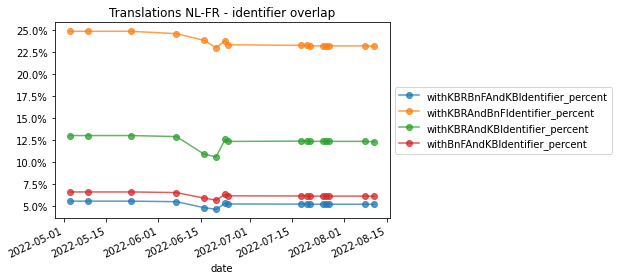

In [13]:
utils_plot.plotPercentageTimeline(statsNLFR,
                                  ['withKBRBnFAndKBIdentifier', 'withKBRAndBnFIdentifier',
                                  'withKBRAndKBIdentifier', 'withBnFAndKBIdentifier'],
                                  'Translations NL-FR - identifier overlap',
                                 'numberTranslations')

## ISBN identifiers
The total number of translations and how many have ISBN10/ISBN13.

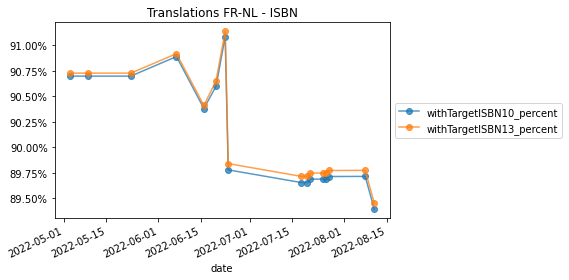

In [14]:
utils_plot.plotPercentageTimeline(statsFRNL,
                                  ['withTargetISBN10', 'withTargetISBN13'],
                                  'Translations FR-NL - ISBN',
                                 'numberTranslations')

In [15]:
from IPython.display import display, Markdown
display(Markdown(statsFRNL['comment'].to_markdown()))

| date                | comment                                                                                                                                                                   |
|:--------------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 2022-05-03 00:00:00 | Data integrated from KBR, BnF and KB based on ISBN10 and ISBN13 identifiers.                                                                                              |
| 2022-05-09 00:00:00 | Data integrated from KBR, BnF and KB based on ISBN10 and ISBN13 identifiers. Additionally KBR original title from field 246.                                              |
| 2022-05-23 00:00:00 | No changes to previous version.                                                                                                                                           |
| 2022-06-07 00:00:00 | Added publishing directors and included a collumn for source titles from KB                                                                                               |
| 2022-06-16 00:00:00 | Removed duplicate manifestations with the same ISBN10/ISBN13                                                                                                              |
| 2022-06-20 00:00:00 | New KBR data dump with plenty of additions and refinements and ISBN fix for FR-NL                                                                                         |
| 2022-06-23 00:00:00 | No ISBN duplicate removal anymore to prevent data loss                                                                                                                    |
| 2022-06-24 00:00:00 | New KBR dump with old Dutch, old French and middle French as well as new data in general                                                                                  |
| 2022-07-18 00:00:00 | Dataprofile query filtering also for Belgian organizations, not just Belgian persons (KB data was also updated from SPARQL endpoint, but did not cause more translations) |
| 2022-07-20 00:00:00 | Fixed error in ISNI-SRU integration SPARQL query.                                                                                                                         |
| 2022-07-21 00:00:00 | Manually curated Wikidata overlap used as bridge identifeir with adapted integration SPARQL queries.                                                                      |
| 2022-07-25 00:00:00 | Contributors integrated using also ISNI identifiers retrieved from Wikidata via QID                                                                                       |
| 2022-07-26 00:00:00 | Added roughly 5,000 more contributors from BnF, providing additional nationality information                                                                              |
| 2022-07-27 00:00:00 | Added missing nationalities from Wikidata                                                                                                                                 |
| 2022-08-08 00:00:00 | Added source links KBR identified via exact title match or 0.9 similarity                                                                                                 |
| 2022-08-11 00:00:00 | New export from the KBR catalogue                                                                                                                                         |

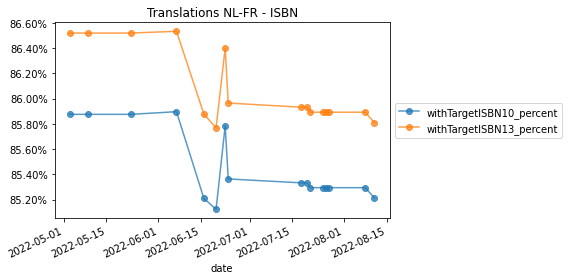

In [16]:
utils_plot.plotPercentageTimeline(statsNLFR,
                                  ['withTargetISBN10', 'withTargetISBN13'],
                                  'Translations NL-FR - ISBN',
                                 'numberTranslations')

## Information about original of translation (source)
The total number of translation and for how many we have which kind of information for the original.

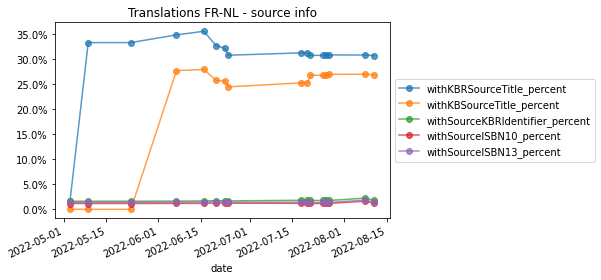

In [17]:
utils_plot.plotPercentageTimeline(statsFRNL,
                                  ['withKBRSourceTitle', 'withKBSourceTitle', 'withSourceKBRIdentifier', 'withSourceISBN10', 'withSourceISBN13'],
                                  'Translations FR-NL - source info',
                                 'numberTranslations')

In [18]:
statsFRNL[['numberTranslations', 'withKBRIdentifier', 'withKBRSourceTitle', 'withKBSourceTitle', 'withSourceKBRIdentifier', 'withSourceISBN10', 'withSourceISBN13']]

,numberTranslations,withKBRIdentifier,withKBRSourceTitle,withKBSourceTitle,withSourceKBRIdentifier,withSourceISBN10,withSourceISBN13
date,,,,,,,
2022-05-03,6891,6125,111,0,111,80,97
2022-05-09,6891,6125,2291,0,111,80,97
2022-05-23,6891,6125,2291,0,111,80,97
2022-06-07,7091,6325,2467,1961,116,84,101
2022-06-16,6715,5980,2384,1873,112,80,97
2022-06-20,7350,6669,2399,1890,127,93,111
2022-06-23,7752,7040,2489,1983,131,96,114
2022-06-24,8149,7439,2504,1990,137,99,117
2022-07-18,8254,7524,2575,2082,149,99,117


In [19]:
from IPython.display import display, Markdown
display(Markdown(statsFRNL['comment'].to_markdown()))

| date                | comment                                                                                                                                                                   |
|:--------------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 2022-05-03 00:00:00 | Data integrated from KBR, BnF and KB based on ISBN10 and ISBN13 identifiers.                                                                                              |
| 2022-05-09 00:00:00 | Data integrated from KBR, BnF and KB based on ISBN10 and ISBN13 identifiers. Additionally KBR original title from field 246.                                              |
| 2022-05-23 00:00:00 | No changes to previous version.                                                                                                                                           |
| 2022-06-07 00:00:00 | Added publishing directors and included a collumn for source titles from KB                                                                                               |
| 2022-06-16 00:00:00 | Removed duplicate manifestations with the same ISBN10/ISBN13                                                                                                              |
| 2022-06-20 00:00:00 | New KBR data dump with plenty of additions and refinements and ISBN fix for FR-NL                                                                                         |
| 2022-06-23 00:00:00 | No ISBN duplicate removal anymore to prevent data loss                                                                                                                    |
| 2022-06-24 00:00:00 | New KBR dump with old Dutch, old French and middle French as well as new data in general                                                                                  |
| 2022-07-18 00:00:00 | Dataprofile query filtering also for Belgian organizations, not just Belgian persons (KB data was also updated from SPARQL endpoint, but did not cause more translations) |
| 2022-07-20 00:00:00 | Fixed error in ISNI-SRU integration SPARQL query.                                                                                                                         |
| 2022-07-21 00:00:00 | Manually curated Wikidata overlap used as bridge identifeir with adapted integration SPARQL queries.                                                                      |
| 2022-07-25 00:00:00 | Contributors integrated using also ISNI identifiers retrieved from Wikidata via QID                                                                                       |
| 2022-07-26 00:00:00 | Added roughly 5,000 more contributors from BnF, providing additional nationality information                                                                              |
| 2022-07-27 00:00:00 | Added missing nationalities from Wikidata                                                                                                                                 |
| 2022-08-08 00:00:00 | Added source links KBR identified via exact title match or 0.9 similarity                                                                                                 |
| 2022-08-11 00:00:00 | New export from the KBR catalogue                                                                                                                                         |

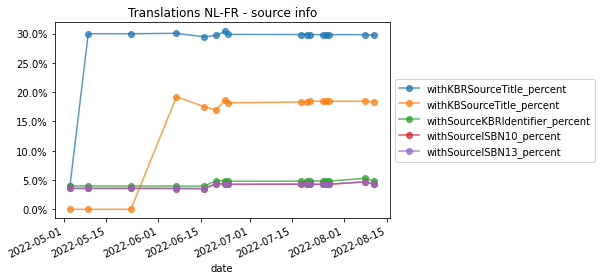

In [20]:
utils_plot.plotPercentageTimeline(statsNLFR,
                                  ['withKBRSourceTitle', 'withKBSourceTitle', 'withSourceKBRIdentifier', 'withSourceISBN10', 'withSourceISBN13'],
                                  'Translations NL-FR - source info',
                                 'numberTranslations')

In [21]:
statsNLFR[['numberTranslations', 'withKBRIdentifier', 'withKBRSourceTitle', 'withKBSourceTitle', 'withSourceKBRIdentifier', 'withSourceISBN10', 'withSourceISBN13']]

,numberTranslations,withKBRIdentifier,withKBRSourceTitle,withKBSourceTitle,withSourceKBRIdentifier,withSourceISBN10,withSourceISBN13
date,,,,,,,
2022-05-03,3731,3249,149,0,149,133,134
2022-05-09,3731,3249,1119,0,149,133,134
2022-05-23,3731,3249,1119,0,149,133,134
2022-06-07,3772,3290,1134,725,150,134,135
2022-06-16,3597,3115,1060,631,142,127,127
2022-06-20,3724,3247,1106,632,182,161,163
2022-06-23,3897,3420,1185,728,190,169,171
2022-06-24,3997,3525,1194,727,192,170,172
2022-07-18,4009,3532,1197,735,193,171,173


In [22]:
statsNLFR

,measurementTime,corpus,numberTranslations,withTargetISBN10,withTargetISBN13,withKBRIdentifier,withBnFIdentifier,withKBIdentifier,withKBRBnFAndKBIdentifier,withKBRAndBnFIdentifier,...,withKBRAndBnFIdentifier_percent,withKBRAndKBIdentifier_percent,withBnFAndKBIdentifier_percent,withTargetISBN10_percent,withTargetISBN13_percent,withKBRSourceTitle_percent,withKBSourceTitle_percent,withSourceKBRIdentifier_percent,withSourceISBN10_percent,withSourceISBN13_percent
date,,,,,,,,,,,,,,,,,,,,,
2022-05-03,2022-08-11 15:03:18.999392,NL-FR,3731,3204,3228,3249,1211,724,208,928,...,24.872688,13.025998,6.620209,85.875101,86.518360,3.993567,0.000000,3.993567,3.564728,3.591530
2022-05-09,2022-08-11 15:03:19.407828,NL-FR,3731,3204,3228,3249,1211,724,208,928,...,24.872688,13.025998,6.620209,85.875101,86.518360,29.991959,0.000000,3.993567,3.564728,3.591530
2022-05-23,2022-08-11 15:03:19.768493,NL-FR,3731,3204,3228,3249,1211,724,208,928,...,24.872688,13.025998,6.620209,85.875101,86.518360,29.991959,0.000000,3.993567,3.564728,3.591530
2022-06-07,2022-08-11 15:03:20.357389,NL-FR,3772,3240,3264,3290,1211,725,208,928,...,24.602333,12.910923,6.548250,85.896076,86.532344,30.063627,19.220573,3.976670,3.552492,3.579003
2022-06-16,2022-08-11 15:03:21.512369,NL-FR,3597,3065,3089,3115,1141,631,174,858,...,23.853211,10.925771,5.921601,85.209897,85.877120,29.469002,17.542396,3.947734,3.530720,3.530720
2022-06-20,2022-08-11 15:03:22.875337,NL-FR,3724,3170,3194,3247,1136,632,173,857,...,23.012889,10.606874,5.692803,85.123523,85.767991,29.699248,16.970999,4.887218,4.323308,4.377014
2022-06-23,2022-08-11 15:03:24.483807,NL-FR,3897,3343,3367,3420,1207,728,208,928,...,23.813190,12.599435,6.338209,85.783936,86.399795,30.408006,18.681037,4.875545,4.336669,4.387991
2022-06-24,2022-08-11 15:03:25.745785,NL-FR,3997,3412,3436,3525,1209,727,210,933,...,23.342507,12.359269,6.179635,85.364023,85.964473,29.872404,18.188641,4.803603,4.253190,4.303227
2022-07-18,2022-08-11 15:03:27.384662,NL-FR,4009,3421,3445,3532,1209,735,210,933,...,23.272637,12.397107,6.161137,85.333001,85.931654,29.857820,18.333749,4.814168,4.265403,4.315291


In [23]:
statsFRNL

,measurementTime,corpus,numberTranslations,withTargetISBN10,withTargetISBN13,withKBRIdentifier,withBnFIdentifier,withKBIdentifier,withKBRBnFAndKBIdentifier,withKBRAndBnFIdentifier,...,withKBRAndBnFIdentifier_percent,withKBRAndKBIdentifier_percent,withBnFAndKBIdentifier_percent,withTargetISBN10_percent,withTargetISBN13_percent,withKBRSourceTitle_percent,withKBSourceTitle_percent,withSourceKBRIdentifier_percent,withSourceISBN10_percent,withSourceISBN13_percent
date,,,,,,,,,,,,,,,,,,,,,
2022-05-03,2022-08-11 15:03:18.666019,FR-NL,6891,6250,6252,6125,58,1817,4,13,...,0.188652,15.904803,0.058047,90.698012,90.727035,1.610797,0.000000,1.610797,1.160935,1.407633
2022-05-09,2022-08-11 15:03:19.266010,FR-NL,6891,6250,6252,6125,58,1817,4,13,...,0.188652,15.904803,0.058047,90.698012,90.727035,33.246263,0.000000,1.610797,1.160935,1.407633
2022-05-23,2022-08-11 15:03:19.608418,FR-NL,6891,6250,6252,6125,58,1817,4,13,...,0.188652,15.904803,0.058047,90.698012,90.727035,33.246263,0.000000,1.610797,1.160935,1.407633
2022-06-07,2022-08-11 15:03:20.089395,FR-NL,7091,6445,6447,6325,58,1961,4,13,...,0.183331,17.486955,0.056410,90.889860,90.918065,34.790580,27.654774,1.635876,1.184600,1.424341
2022-06-16,2022-08-11 15:03:20.957342,FR-NL,6715,6069,6071,5980,57,1873,4,12,...,0.178704,17.617275,0.059568,90.379747,90.409531,35.502606,27.892777,1.667908,1.191363,1.444527
2022-06-20,2022-08-11 15:03:22.498240,FR-NL,7350,6659,6663,6669,51,1890,4,12,...,0.163265,16.979592,0.054422,90.598639,90.653061,32.639456,25.714286,1.727891,1.265306,1.510204
2022-06-23,2022-08-11 15:03:23.761118,FR-NL,7752,7061,7065,7040,52,1983,4,13,...,0.167699,16.898865,0.051600,91.086171,91.137771,32.107843,25.580495,1.689886,1.238390,1.470588
2022-06-24,2022-08-11 15:03:25.230989,FR-NL,8149,7316,7321,7439,51,1990,4,13,...,0.159529,16.173764,0.049086,89.777887,89.839244,30.727697,24.420174,1.681188,1.214873,1.435759
2022-07-18,2022-08-11 15:03:26.606692,FR-NL,8254,7400,7405,7524,51,2082,4,13,...,0.157499,16.840320,0.048461,89.653501,89.714078,31.196995,25.224134,1.805185,1.199418,1.417495


## All statistics for the 'other' corpus
Compared to above things are only in one graph

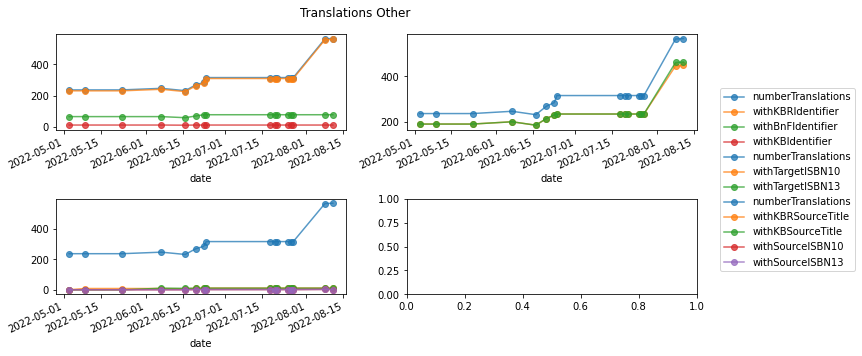

In [24]:
utils_plot.plotTranslationStats(statsOther, 'Translations Other')

In [25]:
statsOther

,measurementTime,corpus,numberTranslations,withTargetISBN10,withTargetISBN13,withKBRIdentifier,withBnFIdentifier,withKBIdentifier,withKBRBnFAndKBIdentifier,withKBRAndBnFIdentifier,withKBRAndKBIdentifier,withBnFAndKBIdentifier,withBBThesaurusID,withSourceKBRIdentifier,withKBRSourceTitle,withKBSourceTitle,withSourceISBN10,withSourceISBN13,comment
date,,,,,,,,,,,,,,,,,,,
2022-05-03,2022-08-11 15:03:19.087328,OTHER,236,190,190,230,65,11,2,59,10,3,201,1,1,0,1,1,"Data integrated from KBR, BnF and KB based on ..."
2022-05-09,2022-08-11 15:03:19.480164,OTHER,236,190,190,230,65,11,2,59,10,3,201,1,9,0,1,1,"Data integrated from KBR, BnF and KB based on ..."
2022-05-23,2022-08-11 15:03:19.951342,OTHER,236,190,190,230,65,11,2,59,10,3,201,1,9,0,1,1,No changes to previous version.
2022-06-07,2022-08-11 15:03:20.509962,OTHER,246,200,200,240,65,11,2,59,10,3,211,1,9,11,1,1,Added publishing directors and included a coll...
2022-06-16,2022-08-11 15:03:21.935377,OTHER,231,185,185,225,58,10,1,52,9,2,201,1,7,10,1,1,Removed duplicate manifestations with the same...
2022-06-20,2022-08-11 15:03:23.247931,OTHER,268,214,214,262,69,11,2,63,10,3,231,3,10,11,2,2,New KBR data dump with plenty of additions and...
2022-06-23,2022-08-11 15:03:24.821613,OTHER,284,230,230,278,77,11,2,71,10,3,243,3,11,11,2,2,No ISBN duplicate removal anymore to prevent d...
2022-06-24,2022-08-11 15:03:26.123857,OTHER,315,234,234,309,77,11,2,71,10,3,273,4,12,11,2,2,"New KBR dump with old Dutch, old French and mi..."
2022-07-18,2022-08-11 15:03:28.000232,OTHER,315,234,234,309,77,11,2,71,10,3,273,4,12,11,2,2,Dataprofile query filtering also for Belgian o...
